In [73]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [74]:
#Loading Data 
df = pd.read_csv('gld_price_data.csv')

In [75]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [76]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [77]:
#NO. OF ROWS AND COLUMNS
df.shape

(2290, 6)

In [78]:
#GETTING DATA TYPES OF COLUMNS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [79]:
# CHECKING NULL VALUES IN DATA
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [80]:
#GETTING STATISTICAL MEASURES OF DATA
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [81]:
#CALCULATING CORRELATION
correlation = df.corr()

<AxesSubplot:>

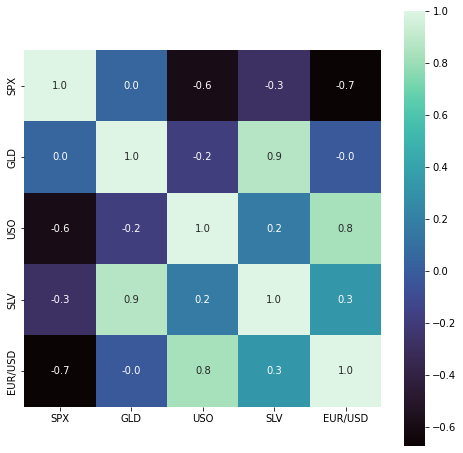

In [82]:
#PLOTTING HEATMAP FOR CORRELATION
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar= True, square= True, fmt= '.1f', annot = True, annot_kws={'size':10}, cmap= 'mako')


In [83]:
# CORRELATION OF GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\eshal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

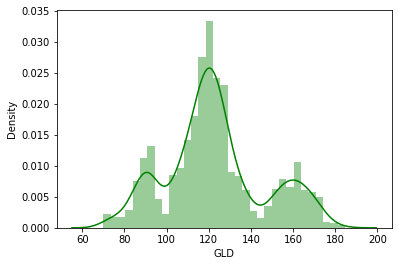

In [84]:
# CHECKING THE DENSITY OF THE GOLD PRICE BY PLOTTING A DISTRIBUTION GRAPH
sns.distplot(df['GLD'],color= 'green')

In [85]:
#SPLITTING FEATURES AND TARGET
X = df.drop(['Date','GLD'], axis=1)
y = df['GLD']

In [86]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [87]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [88]:
#SPLITTING IN TRAIN AND TEST DATA
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state=0)


In [89]:
# TRAINING THE MODEL 
model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
# MODEL EVALUATION
x_pred = model.predict(X_test)
print(x_pred)

[127.04069833 116.81099952 139.63170054 122.10619993  94.42380072
 155.57480037 117.62560125 113.39300119 153.94149983 105.54240019
 103.13979916 120.02780064  92.18519937 158.40930141 121.5919984
 117.45220094  86.80989842  91.93959923  93.08509971 125.33559971
  83.3331996  117.52849872 126.32719847 171.78329797 169.37569728
 139.73290258 114.27639936 160.07110343 133.80940098 115.12110048
 111.21910088 104.72310176 128.13110084 122.12939978  98.85989935
 120.0204001   83.87070009 114.92969992 127.51269884 140.21399874
 107.105501   131.645301   108.34239939 136.44099995 133.86809877
 148.97679925 119.58320052 156.79050081 156.04370116 127.75409996
 123.94300028 114.99069821 124.09170041 119.29579944 153.75980007
 121.44269936 112.60120034  86.79529946 155.71990012 118.2937011
  88.01079875 114.67589997  83.16899922 146.27669772 125.08680027
 127.37129863 125.06559978 120.93500001 167.8674012  121.86089901
 125.6490015  172.49749851 121.41540108 169.71760174 118.93280043
 127.0348994

In [91]:
# R squared error
error_score = metrics.r2_score(y_test, x_pred)
print(f'R squared error is {round(error_score,4)}')

R squared error is 0.9904


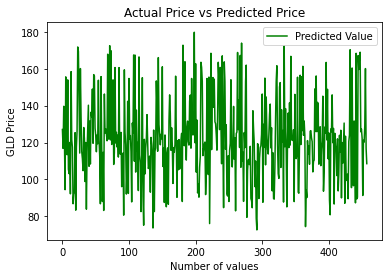

In [92]:
#PLOTTING ACTUAL AND PREDICTED VALUES 
y_test = list(y_test)
plt.plot(x_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()